# Filter

python=3.7

|topic      |platform   |language   |
|-----------|-----------|-----------|
|QAnon  |Twitter    |en         |

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

name_suffix = "[v2][debunking=keywords][lang=en][topic=QAnon][platform=Twitter]"

## Screening of posts related to April 1, 2020 - April 30, 2021

In [ ]:
# keywords
keywords = ["QAnon"]

# settings for result filename
label = 'en+QAnon'

# set file range
start_num = 11
end_num = 17

# file path
source_path = "/mnt/data/Project7/fakenews/csv/"
target_path = "data/csv_filtered/"

# 运行
cmd = ' '.join([
        f'python 1_filter[multi_files][Twitter].py', 
        f'--keywords="{str(keywords)}"', 
        f'--result_label={label}', 
        f'--file_number_range="{str((start_num, end_num))}"', 
        f'--proc_num=10'
    ])
print(cmd)
! {cmd} 

python 1_filter[multi_files][Twitter].py --keywords="['QAnon']" --result_label=en+QAnon --file_number_range="(11, 17)" --proc_num=10

Arguments are listed bellow.
keywords: ['QAnon']
start_file_num: 11
end_file_num: 17
result_label: en+QAnon
number of process: 10
source_path: /mnt/data/Project7/fakenews/csv/
target_path: data/csv_filtered/
chunksize: 100000

processing 12.csv ... ...
processing 11.csv ... ...
processing 17.csv ... ...
processing 16.csv ... ...
processing 15.csv ... ...
processing 14.csv ... ...
processing 13.csv ... ...
14.csv processed.
16.csv processed.
17.csv processed.
12.csv processed.
15.csv processed.
13.csv processed.
11.csv processed.
Done.


In [ ]:
# language choice
results = []
for i in range(start_num, end_num+1):
    df = pd.read_csv(f"{target_path}tweet[{label}][{i}].csv")
    results.append(df)
results.reverse()
df = pd.concat(results, axis=0)
df.drop_duplicates(subset='id', keep='first', inplace=True)  
df = df[df['lang'] == 'en']  
df.reset_index(drop=True, inplace=True)  

In [ ]:
# time range data
start_date = pd.to_datetime('2020-4-1T00:00:00.000Z')
end_date = pd.to_datetime('2021-5-1T00:00:00.000Z')
df['created_at'] = pd.to_datetime(df['created_at'])
data = df[(start_date < df['created_at']) & (df['created_at'] < end_date)]
data.to_csv(f"data/full_data{name_suffix}.csv", index=False)
data.loc[:, ['created_at']]

,created_at
1721,2021-04-30 23:20:43+00:00
1722,2021-04-30 23:18:28+00:00
1723,2021-04-30 23:11:45+00:00
1724,2021-04-30 23:04:55+00:00
1725,2021-04-30 22:54:53+00:00
...,...
145079,2020-04-01 00:43:49+00:00
145080,2020-04-01 00:43:41+00:00
145081,2020-04-01 00:41:14+00:00
145082,2020-04-01 00:39:00+00:00


In [ ]:
# data = pd.read_csv(f"data/full_data{name_suffix}.csv")


authors = set(data[data['author.username'].notna()]['author.username'])
in_reply_to_users = set(data[data['in_reply_to_username'].notna()]['in_reply_to_username'])
retweeted_users = set(data[data['retweeted_username'].notna()]['retweeted_username'])
quoted_users = set(data[data['quoted_username'].notna()]['quoted_username'])
all_users = authors | in_reply_to_users | retweeted_users | quoted_users

print("authors:", len(authors))
print("in_reply_to_users:", len(in_reply_to_users))
print("retweeted_users:", len(retweeted_users))
print("quoted_users:", len(quoted_users))
print("all_users:", len(all_users))

authors: 93507
in_reply_to_users: 9526
retweeted_users: 4353
quoted_users: 1813
all_users: 100835


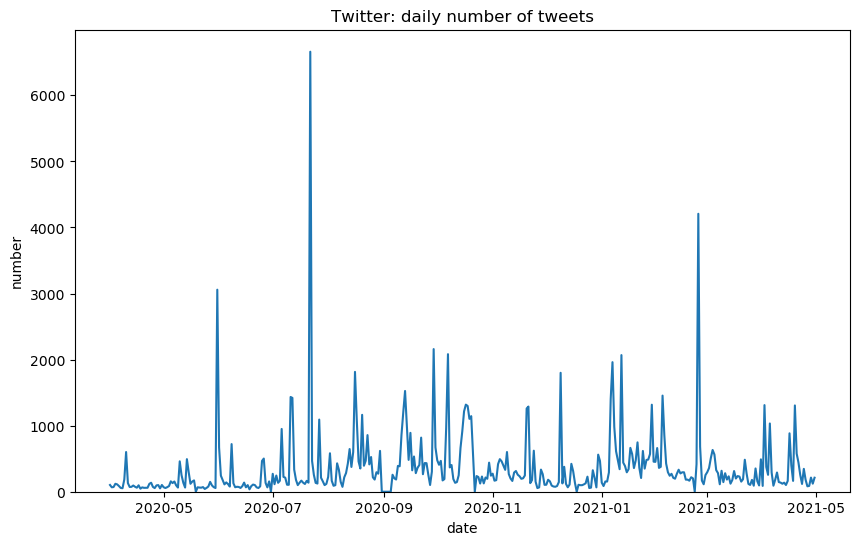

In [ ]:
# Make a chart of the number of posts that change by day
# df = pd.read_csv(f"data/full_data{name_suffix}.csv")
df = data

df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = df['created_at'].dt.date  


date_range = pd.date_range(start=df['date'].min(), end=df['date'].max())
daily_counts = df.groupby('date').size()  
daily_counts = daily_counts.reindex(date_range, fill_value=0)

plt.figure(figsize=(10, 6))

sns.lineplot(data=daily_counts)

plt.title('Twitter: daily number of tweets')
plt.ylim((0,None))
plt.xlabel('date')
plt.ylabel('number')
plt.show()